# 단순 선형 회귀
### #01. 패키지 준비하기

In [45]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

### #02. 데이터셋 준비하기

In [46]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### #03. 데이터 전처리

결측치 확인

In [27]:
origin.isnull().sum()

speed    0
dist     0
dtype: int64

> ###### 결측치 없음

### #04. 탐색적 데이터 분석

기본 통계 확인

In [28]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


산점도 그래프와 추세선 확인

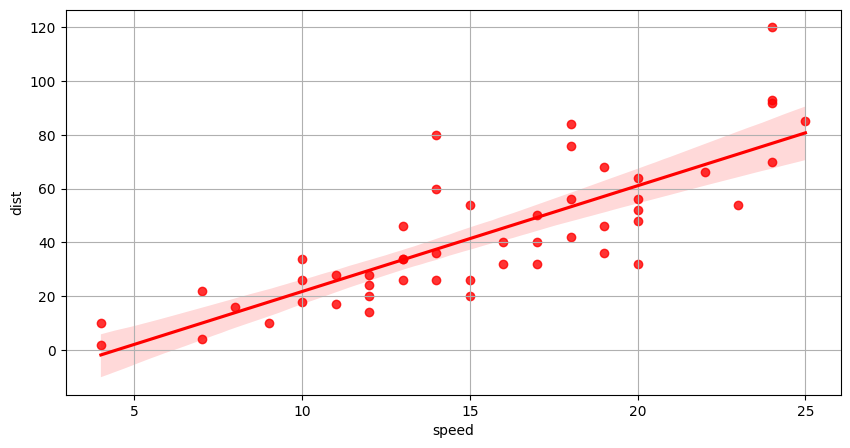

In [29]:
plt.figure(figsize=(10,5))
sb.regplot(data=origin, x='speed', y='dist', color='red')
plt.grid()
plt.show()
plt.close()

> ###### 곡선보다는 선형 분포에 더 가까우므로 단순선형회귀모델을 적용하기로 함

### #05. 데이터셋 분할하기

1. 랜덤시드 고정

In [30]:
np.random.seed(42)

2. 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [47]:
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print("훈련데이터 크기:", x.shape, "/ 레이블 크기:", y.shape)

훈련데이터 크기: (50, 1) / 레이블 크기: (50,)


3. 훈련 데이터와 검증 데이터로 분할

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 35, 검증용 데이터셋 크기: 15


### #06. 모델 개발

1. 모델 정의

In [49]:
model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(32, activation = 'relu', input_shape = (1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [51]:
result = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

# 학습결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/300
2/2 [==============================] - 1s 123ms/step - loss: 2341.0078 - mae: 41.4161 - val_loss: 2601.7297 - val_mae: 43.9755
Epoch 2/300
2/2 [==============================] - 0s 27ms/step - loss: 2315.5610 - mae: 41.1593 - val_loss: 2576.7332 - val_mae: 43.7290
Epoch 3/300
2/2 [==============================] - 0s 29ms/step - loss: 2292.6819 - mae: 40.9119 - val_loss: 2551.4990 - val_mae: 43.4789
Epoch 4/300
2/2 [==============================] - 0s 27ms/step - loss: 2269.1172 - mae: 40.6614 - val_loss: 2526.6333 - val_mae: 43.2311
Epoch 5/300
2/2 [==============================] - 0s 29ms/step - loss: 2245.0977 - mae: 40.4097 - val_loss: 2501.9331 - val_mae: 42.9835
Epoch 6/300
2/2 [==============================] - 0s 31ms/step - loss: 2221.7561 - mae: 40.1599 - val_loss: 2477.0242 - val_mae: 42.7325
Epoch 7/300
2/2 [==============================] - 0s 28ms/step - loss: 2198.1697 - mae: 39.9028 - val_loss: 2452.0889 - val_mae: 42.4798
Epoch 8/300
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2341.007812,41.416142,2601.729736,43.975487
2,2315.561035,41.159298,2576.733154,43.729042
3,2292.681885,40.911873,2551.499023,43.478901
4,2269.117188,40.661350,2526.633301,43.231071
5,2245.097656,40.409653,2501.933105,42.983521
...,...,...,...,...
296,266.447144,13.460258,266.146027,11.026832
297,266.419830,13.453094,266.473328,11.033426
298,266.395813,13.439680,266.949493,11.042887


### #07 학습결과 평가

1. 학습결과  시각화

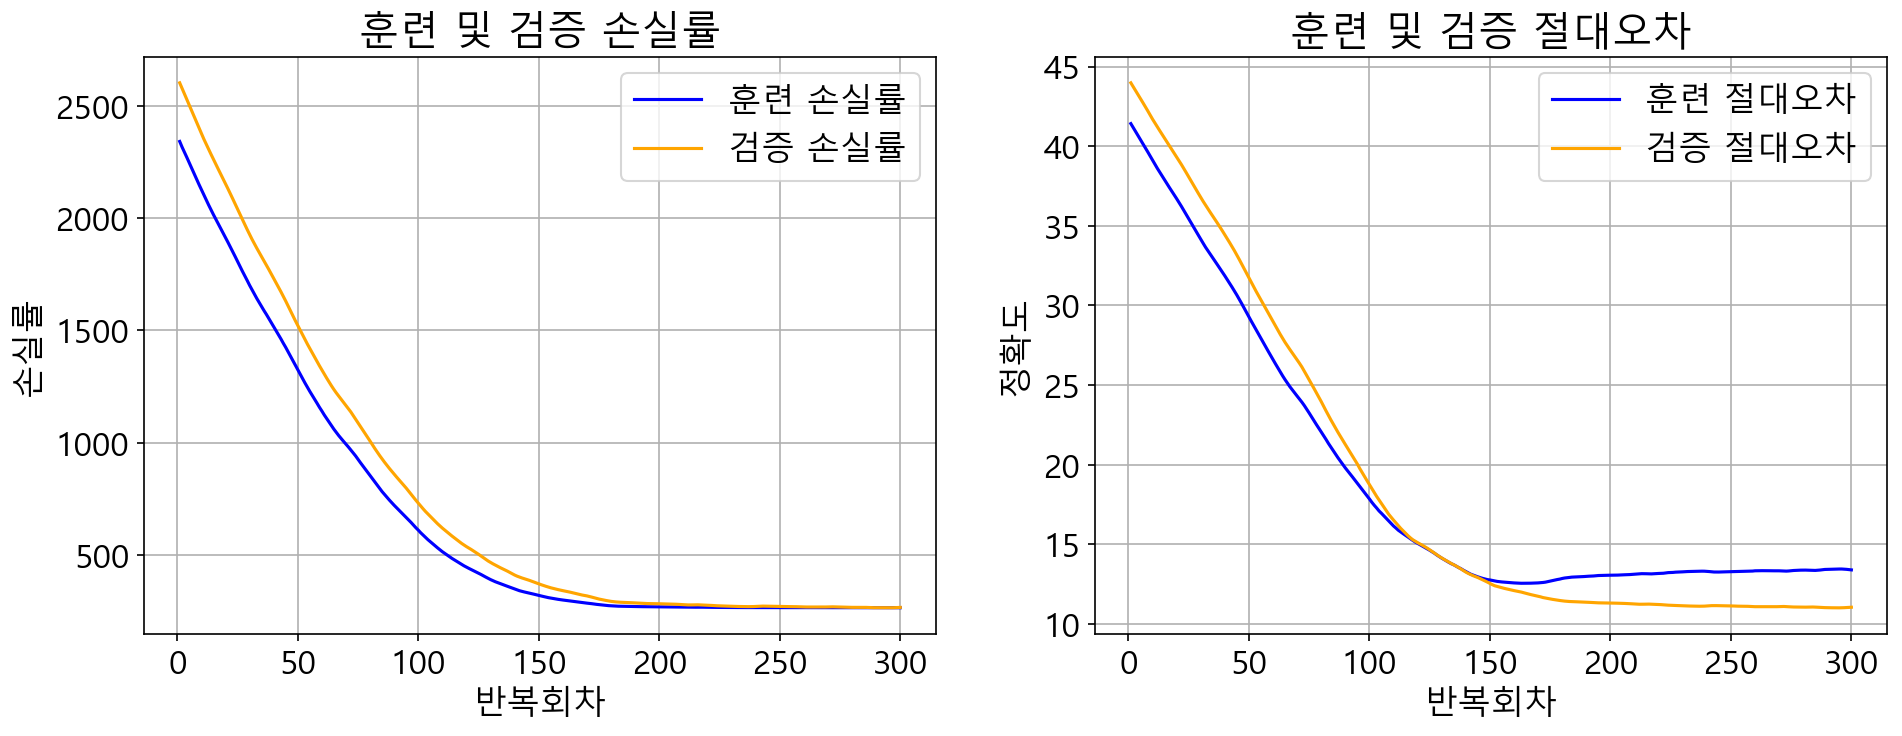

In [52]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

2. 모델 성능 평가

In [53]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 4ms/step - loss: 266.4507 - mae: 13.3901
최종 훈련 손실률: 266.450714, 최종 훈련 절대오차: 13.390089
1/1 [==============================] - 0s 21ms/step - loss: 267.8895 - mae: 11.0612
최종 검증 손실률: 267.889496, 최종 검증 절대오차: 11.061153


### #08. 학습결과 적용

1. 테스트 데이터에 대한 예측결과 산정

In [54]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 39ms/step
[[34.30032 ]
 [56.16177 ]
 [47.963726]
 [67.09249 ]
 [37.033   ]
 [67.09249 ]
 [45.231045]
 [42.498363]
 [50.696407]
 [39.765682]
 [34.30032 ]
 [23.369595]
 [53.42909 ]
 [28.834957]
 [20.636913]]


2. 결과 데이터 셋 구성

In [55]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : results.flatten()
})

kdf['예측오차'] = kdf['실제값']-kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
13,12,24,34.300320,-10.300320
39,20,48,56.161770,-8.161770
30,17,50,47.963726,2.036274
45,24,70,67.092491,2.907509
17,13,34,37.033001,-3.033001
48,24,120,67.092491,52.907509
26,16,32,45.231045,-13.231045
25,15,54,42.498363,11.501637
32,18,56,50.696407,5.303593
19,14,26,39.765682,-13.765682


3. 실제 결과값과 머신러닝에 의한 예측값 비교

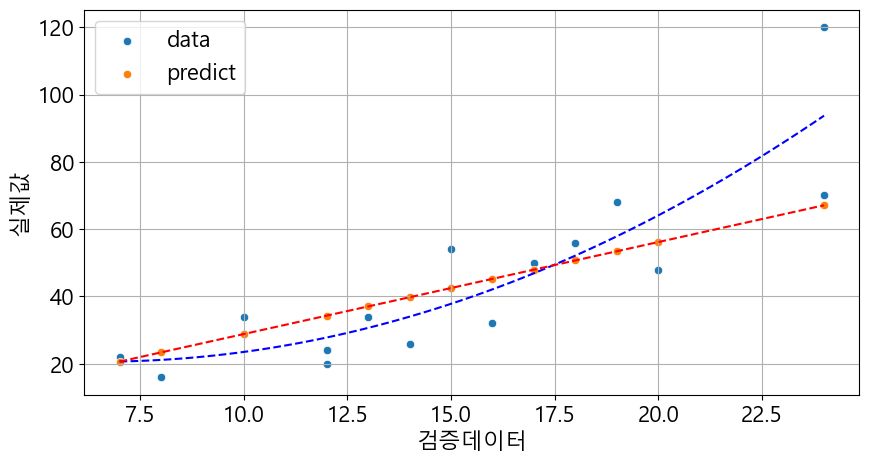

In [56]:
helper.regplot(x_left=kdf['검증데이터'], y_left=kdf['실제값'], y_left_pred=kdf['예측값'])

3. 임의의 값에 대한 머신러닝 예측 결과

In [57]:
my_speed = 50
results = model.predict([[my_speed]])
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, results))

1/1 [==============================] - 0s 67ms/step
속도가 50인 자동차의 제동거리는 138로 예상됩니다.
